In [1]:
import pandas as pd
from IPython.display import display
pd.options.display.max_columns = 999
pd.set_option('display.max_colwidth',10000)
# Since Our Data is Big so Lets see in small

import numpy as np

# For Pyspark 
from pyspark.sql import SparkSession

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
genes_premature = ["EBF1", "EEFSEC","AGTR2"]

## df = Panda DataFrame ds = Spark Data Frame

In [3]:
#df = pd.read_csv("../datas_not_to_upload/989.hg19_multianno.txt.intervar", sep="\t", low_memory=False)
df = pd.read_csv("../datas_not_to_upload/1428/1428.hg19_multianno.txt.intervar", sep = "\t", low_memory=False)

In [4]:
df.style.set_table_attributes('style="font-size:10px"')
df.head()

,#Chr,Start,End,Ref,Alt,Ref.Gene,Func.refGene,ExonicFunc.refGene,Gene.ensGene,avsnp147,AAChange.ensGene,AAChange.refGene,clinvar: Clinvar,InterVar: InterVar and Evidence,Freq_gnomAD_genome_ALL,Freq_esp6500siv2_all,Freq_1000g2015aug_all,CADD_raw,CADD_phred,SIFT_score,GERP++_RS,phyloP46way_placental,dbscSNV_ADA_SCORE,dbscSNV_RF_SCORE,Interpro_domain,AAChange.knownGene,rmsk,MetaSVM_score,Freq_gnomAD_genome_POPs,OMIM,Phenotype_MIM,OrphaNumber,Orpha,Otherinfo
0,1,12783,12783,G,A,DDX11L1,ncRNA_intronic,.,ENSG00000223972,rs62635284,.,.,clinvar: UNK,"InterVar: Benign PVS1=0 PS=[0, 0, 0, 0, 0] PM=[0, 0, 0, 0, 0, 0, 0] PP=[0, 0, 0, 0, 0, 0] BA1=1 BS=[1, 0, 0, 0, 0] BP=[0, 0, 0, 0, 0, 0, 0, 0]",0.5585,.,.,.,.,.,.,.,.,.,.,.,.,.,"AFR:0.5047,AMR:0.5985,EAS:0.4886,FIN:0.5919,NFE:0.5872,OTH:0.5883,ASJ:0.5885",.,.,NaN,NaN,1
1,1,12783,12783,G,A,LOC102725121,ncRNA_intronic,.,ENSG00000223972,rs62635284,.,.,clinvar: UNK,"InterVar: Benign PVS1=0 PS=[0, 0, 0, 0, 0] PM=[0, 0, 0, 0, 0, 0, 0] PP=[0, 0, 0, 0, 0, 0] BA1=1 BS=[1, 0, 0, 0, 0] BP=[0, 0, 0, 0, 0, 0, 0, 0]",0.5585,.,.,.,.,.,.,.,.,.,.,.,.,.,"AFR:0.5047,AMR:0.5985,EAS:0.4886,FIN:0.5919,NFE:0.5872,OTH:0.5883,ASJ:0.5885",.,.,NaN,NaN,1
2,1,13116,13116,T,G,DDX11L1,ncRNA_intronic,.,ENSG00000223972,rs62635286,.,.,clinvar: UNK,"InterVar: Benign PVS1=0 PS=[0, 0, 0, 0, 0] PM=[0, 0, 0, 0, 0, 0, 0] PP=[0, 0, 0, 0, 0, 0] BA1=1 BS=[1, 0, 0, 0, 0] BP=[0, 0, 0, 0, 0, 0, 0, 0]",0.5413,.,0.0970447,.,.,.,.,.,.,.,.,.,.,.,"AFR:0.5062,AMR:0.5783,EAS:0.4585,FIN:0.6125,NFE:0.5468,OTH:0.5613,ASJ:0.5357",.,.,NaN,NaN,1
3,1,13116,13116,T,G,LOC102725121,ncRNA_intronic,.,ENSG00000223972,rs62635286,.,.,clinvar: UNK,"InterVar: Benign PVS1=0 PS=[0, 0, 0, 0, 0] PM=[0, 0, 0, 0, 0, 0, 0] PP=[0, 0, 0, 0, 0, 0] BA1=1 BS=[1, 0, 0, 0, 0] BP=[0, 0, 0, 0, 0, 0, 0, 0]",0.5413,.,0.0970447,.,.,.,.,.,.,.,.,.,.,.,"AFR:0.5062,AMR:0.5783,EAS:0.4585,FIN:0.6125,NFE:0.5468,OTH:0.5613,ASJ:0.5357",.,.,NaN,NaN,1
4,1,13118,13118,A,G,DDX11L1,ncRNA_intronic,.,ENSG00000223972,rs62028691,.,.,clinvar: UNK,"InterVar: Benign PVS1=0 PS=[0, 0, 0, 0, 0] PM=[0, 0, 0, 0, 0, 0, 0] PP=[0, 0, 0, 0, 0, 0] BA1=1 BS=[1, 0, 0, 0, 0] BP=[0, 0, 0, 0, 0, 0, 0, 0]",0.5401,.,0.0970447,.,.,.,.,.,.,.,.,.,.,.,"AFR:0.5024,AMR:0.5776,EAS:0.4550,FIN:0.6127,NFE:0.5466,OTH:0.5613,ASJ:0.5357",.,.,NaN,NaN,1


In [5]:
df.columns

Index(['#Chr', 'Start', 'End', 'Ref', 'Alt', 'Ref.Gene', 'Func.refGene',
       'ExonicFunc.refGene', 'Gene.ensGene', 'avsnp147', 'AAChange.ensGene',
       'AAChange.refGene', 'clinvar: Clinvar ',
       ' InterVar: InterVar and Evidence ', 'Freq_gnomAD_genome_ALL',
       'Freq_esp6500siv2_all', 'Freq_1000g2015aug_all', 'CADD_raw',
       'CADD_phred', 'SIFT_score', 'GERP++_RS', 'phyloP46way_placental',
       'dbscSNV_ADA_SCORE', 'dbscSNV_RF_SCORE', 'Interpro_domain',
       'AAChange.knownGene', 'rmsk', 'MetaSVM_score',
       'Freq_gnomAD_genome_POPs', 'OMIM', 'Phenotype_MIM', 'OrphaNumber',
       'Orpha', 'Otherinfo'],
      dtype='object')

In [6]:
new_col = ['Chr', 'Start', 'End', 'Ref', 'Alt', 'Ref_Gene', 'Func_refGene',
       'ExonicFunc_refGene', 'Gene_ensGene', 'avsnp147', 'AAChange_ensGene',
       'AAChange_refGene', 'Clinvar','InterVar_Evidence','Freq_gnomAD_genome_ALL',
       'Freq_esp6500siv2_all', 'Freq_1000g2015aug_all', 'CADD_raw',
       'CADD_phred', 'SIFT_score', 'GERP++_RS', 'phyloP46way_placental',
       'dbscSNV_ADA_SCORE', 'dbscSNV_RF_SCORE', 'Interpro_domain',
       'AAChange.knownGene', 'rmsk', 'MetaSVM_score',
       'Freq_gnomAD_genome_POPs', 'OMIM', 'Phenotype_MIM', 'OrphaNumber',
       'Orpha', 'Otherinfo']

In [7]:
df.columns = new_col

In [29]:
#df.dtypes # Columns name with Data Type 

In [13]:
df.head()

,Chr,Start,End,Ref,Alt,Ref_Gene,Func_refGene,ExonicFunc_refGene,Gene_ensGene,avsnp147,...,Interpro_domain,AAChange.knownGene,rmsk,MetaSVM_score,Freq_gnomAD_genome_POPs,OMIM,Phenotype_MIM,OrphaNumber,Orpha,Otherinfo
0,1,12783,12783,G,A,DDX11L1,ncRNA_intronic,.,ENSG00000223972,rs62635284,...,.,.,.,.,"AFR:0.5047,AMR:0.5985,EAS:0.4886,FIN:0.5919,NFE:0.5872,OTH:0.5883,ASJ:0.5885",.,.,NaN,NaN,1
1,1,12783,12783,G,A,LOC102725121,ncRNA_intronic,.,ENSG00000223972,rs62635284,...,.,.,.,.,"AFR:0.5047,AMR:0.5985,EAS:0.4886,FIN:0.5919,NFE:0.5872,OTH:0.5883,ASJ:0.5885",.,.,NaN,NaN,1
2,1,13116,13116,T,G,DDX11L1,ncRNA_intronic,.,ENSG00000223972,rs62635286,...,.,.,.,.,"AFR:0.5062,AMR:0.5783,EAS:0.4585,FIN:0.6125,NFE:0.5468,OTH:0.5613,ASJ:0.5357",.,.,NaN,NaN,1
3,1,13116,13116,T,G,LOC102725121,ncRNA_intronic,.,ENSG00000223972,rs62635286,...,.,.,.,.,"AFR:0.5062,AMR:0.5783,EAS:0.4585,FIN:0.6125,NFE:0.5468,OTH:0.5613,ASJ:0.5357",.,.,NaN,NaN,1
4,1,13118,13118,A,G,DDX11L1,ncRNA_intronic,.,ENSG00000223972,rs62028691,...,.,.,.,.,"AFR:0.5024,AMR:0.5776,EAS:0.4550,FIN:0.6127,NFE:0.5466,OTH:0.5613,ASJ:0.5357",.,.,NaN,NaN,1


In [28]:
#df.Clinvar = df.Clinvar.apply(lambda x : x[9:])
df.Clinvar.unique()

array(['UNK ', 'Benign ', 'Benign/Likely_benign ', 'Likely_benign ',
       'Uncertain_significance ', 'drug_response ', 'association ',
       'Conflicting_interpretations_of_pathogenicity ', 'not_provided ',
       'risk_factor ', 'Pathogenic ', 'protective,_risk_factor ',
       'protective ', 'Pathogenic,_risk_factor ', 'Affects,_risk_factor ',
       'Affects ', 'other ', 'Benign/Likely_benign,_protective ',
       'Likely_pathogenic ', 'association,_risk_factor ',
       'Benign/Likely_benign,_risk_factor ',
       'Benign/Likely_benign,_drug_response,_risk_factor ',
       'Benign,_risk_factor ', 'Pathogenic,_protective ',
       'Likely_benign,_drug_response,_other ',
       'Benign/Likely_benign,_other ',
       'Conflicting_interpretations_of_pathogenicity,_other ',
       'Pathogenic/Likely_pathogenic '], dtype=object)

In [81]:
#df['InterVar_Evidence'] = df['InterVar_Evidence'].apply(lambda x: str(x.split()[1:3]))
df['InterVar_Evidence'] = df['InterVar_Evidence'].apply(lambda x: "_".join(x))

In [35]:
#a = ' InterVar: Benign PVS1=0 PS=[0, 0, 0, 0, 0] PM=[0, 0, 0, 0, 0, 0, 0] PP=[0, 0, 0, 0, 0, 0] BA1=1 BS=[1, 0, 0, 0, 0] BP=[0, 0, 0, 0, 0, 0, 0, 0] '
# a.split()[1:3]

In [54]:
df['InterVar_Evidence'].unique()

array(["['Benign', 'PVS1=0']", "['Uncertain', 'significance']",
       "['Likely', 'benign']", "['Pathogenic', 'PVS1=1']",
       "['Likely', 'pathogenic']", "['Benign', 'PVS1=1']"], dtype=object)

In [57]:
df = df.loc[:,['Chr', 'Start', 'End', 'Ref', 'Alt', 'Ref_Gene', 'Func_refGene',
       'ExonicFunc_refGene', 'Gene_ensGene', 'avsnp147', 'Clinvar','InterVar_Evidence','OMIM','Orpha']]

In [58]:
df.head()

,Chr,Start,End,Ref,Alt,Ref_Gene,Func_refGene,ExonicFunc_refGene,Gene_ensGene,avsnp147,Clinvar,InterVar_Evidence,OMIM,Orpha
0,1,12783,12783,G,A,DDX11L1,ncRNA_intronic,.,ENSG00000223972,rs62635284,UNK,"['Benign', 'PVS1=0']",.,NaN
1,1,12783,12783,G,A,LOC102725121,ncRNA_intronic,.,ENSG00000223972,rs62635284,UNK,"['Benign', 'PVS1=0']",.,NaN
2,1,13116,13116,T,G,DDX11L1,ncRNA_intronic,.,ENSG00000223972,rs62635286,UNK,"['Benign', 'PVS1=0']",.,NaN
3,1,13116,13116,T,G,LOC102725121,ncRNA_intronic,.,ENSG00000223972,rs62635286,UNK,"['Benign', 'PVS1=0']",.,NaN
4,1,13118,13118,A,G,DDX11L1,ncRNA_intronic,.,ENSG00000223972,rs62028691,UNK,"['Benign', 'PVS1=0']",.,NaN


In [65]:
df[(df.Ref_Gene == "NONE")]# & (df.Clinvar == "UNK")]

,Chr,Start,End,Ref,Alt,Ref_Gene,Func_refGene,ExonicFunc_refGene,Gene_ensGene,avsnp147,Clinvar,InterVar_Evidence,OMIM,Orpha
87645,1,42386080,42386080,G,A,NONE,intergenic,.,ENSG00000127124;NONE,rs4660582,UNK,"['Benign', 'PVS1=0']",.,NaN
87647,1,42386267,42386267,G,T,NONE,intergenic,.,ENSG00000127124;NONE,rs1998758,UNK,"['Benign', 'PVS1=0']",.,NaN
87649,1,42387383,42387384,AT,-,NONE,intergenic,.,ENSG00000127124;NONE,rs10556751,UNK,"['Benign', 'PVS1=0']",.,NaN
87651,1,42389935,42389935,G,A,NONE,intergenic,.,ENSG00000127124;NONE,rs11210548,UNK,"['Benign', 'PVS1=0']",.,NaN
87653,1,42390317,42390317,C,T,NONE,intergenic,.,ENSG00000127124;NONE,rs4660584,UNK,"['Benign', 'PVS1=0']",.,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6422895,M,16184,16184,C,-,NONE,intergenic,.,ENSG00000210196;ENSG00000198727;ENSG00000210195,.,UNK,"['Uncertain', 'significance']",.,NaN
6422897,M,16215,16215,G,A,NONE,intergenic,.,ENSG00000210196;ENSG00000198727;ENSG00000210195,.,UNK,"['Uncertain', 'significance']",.,NaN
6422899,M,16300,16300,T,C,NONE,intergenic,.,ENSG00000210196;ENSG00000198727;ENSG00000210195,.,UNK,"['Uncertain', 'significance']",.,NaN
6422901,M,16322,16322,T,C,NONE,intergenic,.,ENSG00000210196;ENSG00000198727;ENSG00000210195,.,UNK,"['Uncertain', 'significance']",.,NaN


In [63]:
df.shape

(6422904, 14)

In [75]:
df[(df.Ref_Gene == "NONE") & (df.Clinvar == "UNK ")]

,Chr,Start,End,Ref,Alt,Ref_Gene,Func_refGene,ExonicFunc_refGene,Gene_ensGene,avsnp147,Clinvar,InterVar_Evidence,OMIM,Orpha
87645,1,42386080,42386080,G,A,NONE,intergenic,.,ENSG00000127124;NONE,rs4660582,UNK,"['Benign', 'PVS1=0']",.,NaN
87647,1,42386267,42386267,G,T,NONE,intergenic,.,ENSG00000127124;NONE,rs1998758,UNK,"['Benign', 'PVS1=0']",.,NaN
87649,1,42387383,42387384,AT,-,NONE,intergenic,.,ENSG00000127124;NONE,rs10556751,UNK,"['Benign', 'PVS1=0']",.,NaN
87651,1,42389935,42389935,G,A,NONE,intergenic,.,ENSG00000127124;NONE,rs11210548,UNK,"['Benign', 'PVS1=0']",.,NaN
87653,1,42390317,42390317,C,T,NONE,intergenic,.,ENSG00000127124;NONE,rs4660584,UNK,"['Benign', 'PVS1=0']",.,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6422895,M,16184,16184,C,-,NONE,intergenic,.,ENSG00000210196;ENSG00000198727;ENSG00000210195,.,UNK,"['Uncertain', 'significance']",.,NaN
6422897,M,16215,16215,G,A,NONE,intergenic,.,ENSG00000210196;ENSG00000198727;ENSG00000210195,.,UNK,"['Uncertain', 'significance']",.,NaN
6422899,M,16300,16300,T,C,NONE,intergenic,.,ENSG00000210196;ENSG00000198727;ENSG00000210195,.,UNK,"['Uncertain', 'significance']",.,NaN
6422901,M,16322,16322,T,C,NONE,intergenic,.,ENSG00000210196;ENSG00000198727;ENSG00000210195,.,UNK,"['Uncertain', 'significance']",.,NaN


From the above we can Make Conclusion that if Reference gene is UNK then CLinvar is UNKnown

In [78]:
# Drop all the rows where ref. Gene in Unknown
df.drop(df[df.Ref_Gene == "NONE"].index)  # 

,Chr,Start,End,Ref,Alt,Ref_Gene,Func_refGene,ExonicFunc_refGene,Gene_ensGene,avsnp147,Clinvar,InterVar_Evidence,OMIM,Orpha
0,1,12783,12783,G,A,DDX11L1,ncRNA_intronic,.,ENSG00000223972,rs62635284,UNK,"['Benign', 'PVS1=0']",.,NaN
1,1,12783,12783,G,A,LOC102725121,ncRNA_intronic,.,ENSG00000223972,rs62635284,UNK,"['Benign', 'PVS1=0']",.,NaN
2,1,13116,13116,T,G,DDX11L1,ncRNA_intronic,.,ENSG00000223972,rs62635286,UNK,"['Benign', 'PVS1=0']",.,NaN
3,1,13116,13116,T,G,LOC102725121,ncRNA_intronic,.,ENSG00000223972,rs62635286,UNK,"['Benign', 'PVS1=0']",.,NaN
4,1,13118,13118,A,G,DDX11L1,ncRNA_intronic,.,ENSG00000223972,rs62028691,UNK,"['Benign', 'PVS1=0']",.,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6422894,M,16184,16184,C,-,MIR12136,intergenic,.,ENSG00000210196;ENSG00000198727;ENSG00000210195,.,UNK,"['Uncertain', 'significance']",.,NaN
6422896,M,16215,16215,G,A,MIR12136,intergenic,.,ENSG00000210196;ENSG00000198727;ENSG00000210195,.,UNK,"['Uncertain', 'significance']",.,NaN
6422898,M,16300,16300,T,C,MIR12136,intergenic,.,ENSG00000210196;ENSG00000198727;ENSG00000210195,.,UNK,"['Uncertain', 'significance']",.,NaN
6422900,M,16322,16322,T,C,MIR12136,intergenic,.,ENSG00000210196;ENSG00000198727;ENSG00000210195,.,UNK,"['Uncertain', 'significance']",.,NaN


In [82]:
df.head()

,Chr,Start,End,Ref,Alt,Ref_Gene,Func_refGene,ExonicFunc_refGene,Gene_ensGene,avsnp147,Clinvar,InterVar_Evidence,OMIM,Orpha
0,1,12783,12783,G,A,DDX11L1,ncRNA_intronic,.,ENSG00000223972,rs62635284,UNK,"[_'_B_e_n_i_g_n_'_,_ _'_P_V_S_1_=_0_'_]",.,NaN
1,1,12783,12783,G,A,LOC102725121,ncRNA_intronic,.,ENSG00000223972,rs62635284,UNK,"[_'_B_e_n_i_g_n_'_,_ _'_P_V_S_1_=_0_'_]",.,NaN
2,1,13116,13116,T,G,DDX11L1,ncRNA_intronic,.,ENSG00000223972,rs62635286,UNK,"[_'_B_e_n_i_g_n_'_,_ _'_P_V_S_1_=_0_'_]",.,NaN
3,1,13116,13116,T,G,LOC102725121,ncRNA_intronic,.,ENSG00000223972,rs62635286,UNK,"[_'_B_e_n_i_g_n_'_,_ _'_P_V_S_1_=_0_'_]",.,NaN
4,1,13118,13118,A,G,DDX11L1,ncRNA_intronic,.,ENSG00000223972,rs62028691,UNK,"[_'_B_e_n_i_g_n_'_,_ _'_P_V_S_1_=_0_'_]",.,NaN


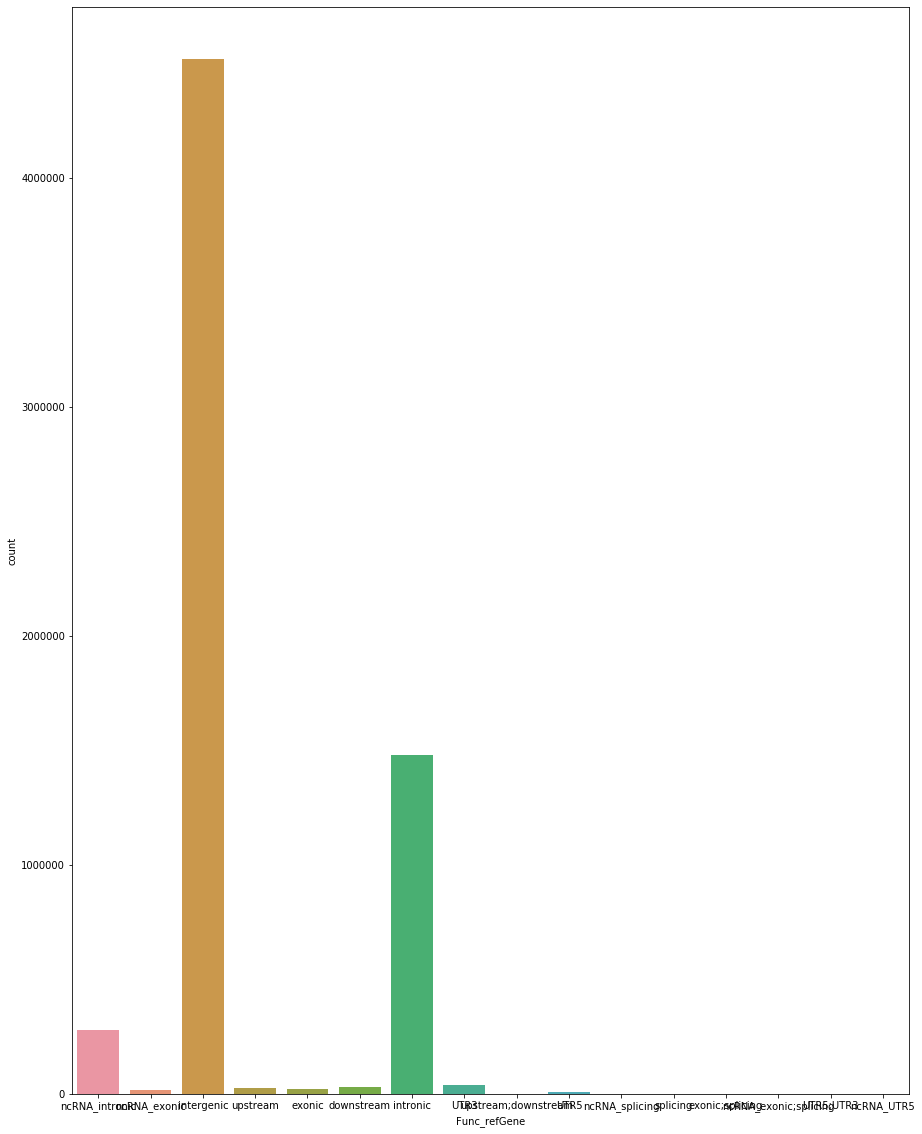

In [88]:
plt.figure(figsize=[15,20])
sns.countplot(df.Func_refGene)

In [ ]:
df.groupby()

In [93]:
df.Clinvar.value_counts().T

UNK                                                     6413361
Benign                                                     6989
Likely_benign                                              1070
Benign/Likely_benign                                        774
Uncertain_significance                                      202
not_provided                                                131
other                                                       115
drug_response                                                70
Conflicting_interpretations_of_pathogenicity                 55
risk_factor                                                  50
association                                                  41
Pathogenic                                                   15
protective                                                    6
Affects                                                       4
Likely_pathogenic                                             4
Likely_benign,_drug_response,_other     

In [94]:
df.Func_refGene.value_counts()

intergenic               4519284
intronic                 1480247
ncRNA_intronic            278988
UTR3                       38823
downstream                 28932
upstream                   27668
exonic                     23279
ncRNA_exonic               16450
UTR5                        6694
upstream;downstream         2079
splicing                     206
exonic;splicing              104
ncRNA_splicing               102
UTR5;UTR3                     36
ncRNA_exonic;splicing         10
ncRNA_UTR5                     2
Name: Func_refGene, dtype: int64

In [84]:
df.Clinvar.unique()

array(['UNK ', 'Benign ', 'Benign/Likely_benign ', 'Likely_benign ',
       'Uncertain_significance ', 'drug_response ', 'association ',
       'Conflicting_interpretations_of_pathogenicity ', 'not_provided ',
       'risk_factor ', 'Pathogenic ', 'protective,_risk_factor ',
       'protective ', 'Pathogenic,_risk_factor ', 'Affects,_risk_factor ',
       'Affects ', 'other ', 'Benign/Likely_benign,_protective ',
       'Likely_pathogenic ', 'association,_risk_factor ',
       'Benign/Likely_benign,_risk_factor ',
       'Benign/Likely_benign,_drug_response,_risk_factor ',
       'Benign,_risk_factor ', 'Pathogenic,_protective ',
       'Likely_benign,_drug_response,_other ',
       'Benign/Likely_benign,_other ',
       'Conflicting_interpretations_of_pathogenicity,_other ',
       'Pathogenic/Likely_pathogenic '], dtype=object)

In [101]:
#df[df.Chr =="Y"]
df.Chr.value_counts()

2     518718
1     485302
4     478551
3     435513
6     415979
5     389743
7     362966
8     325192
11    308943
10    305147
12    301922
9     279441
13    245037
14    203546
X     202522
16    192000
18    189641
15    175250
17    155289
20    134527
19    130839
21    105994
22     80450
Y        318
M         74
Name: Chr, dtype: int64

In [103]:
df.loc[df.Ref_Gene.isin(genes_premature)]

,Chr,Start,End,Ref,Alt,Ref_Gene,Func_refGene,ExonicFunc_refGene,Gene_ensGene,avsnp147,Clinvar,InterVar_Evidence,OMIM,Orpha
1293171,3,127901737,127901737,-,CG,EEFSEC,intronic,.,ENSG00000132394,.,UNK,"[_'_U_n_c_e_r_t_a_i_n_'_,_ _'_s_i_g_n_i_f_i_c_a_n_c_e_'_]",607695,NaN
1293172,3,127923187,127923187,T,C,EEFSEC,intronic,.,ENSG00000132394,rs6439119,UNK,"[_'_B_e_n_i_g_n_'_,_ _'_P_V_S_1_=_0_'_]",607695,NaN
1293173,3,127926254,127926254,A,G,EEFSEC,intronic,.,ENSG00000132394,rs2955126,UNK,"[_'_B_e_n_i_g_n_'_,_ _'_P_V_S_1_=_0_'_]",607695,NaN
1293174,3,127926411,127926411,-,AC,EEFSEC,intronic,.,ENSG00000132394,.,UNK,"[_'_U_n_c_e_r_t_a_i_n_'_,_ _'_s_i_g_n_i_f_i_c_a_n_c_e_'_]",607695,NaN
1293175,3,127926410,127926411,AC,-,EEFSEC,intronic,.,ENSG00000132394,rs10574435,UNK,"[_'_B_e_n_i_g_n_'_,_ _'_P_V_S_1_=_0_'_]",607695,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6359069,X,115557091,115557091,T,-,AGTR2,intergenic,.,ENSG00000207033;ENSG00000087916,rs11292479,UNK,"[_'_B_e_n_i_g_n_'_,_ _'_P_V_S_1_=_0_'_]",300034,NaN
6359071,X,115557802,115557802,G,A,AGTR2,intergenic,.,ENSG00000207033;ENSG00000087916,rs146043934,UNK,"[_'_B_e_n_i_g_n_'_,_ _'_P_V_S_1_=_0_'_]",300034,NaN
6359073,X,115564316,115564316,G,A,AGTR2,intergenic,.,ENSG00000207033;ENSG00000087916,rs72605227,UNK,"[_'_B_e_n_i_g_n_'_,_ _'_P_V_S_1_=_0_'_]",300034,NaN
6359075,X,115564767,115564767,-,TGTG,AGTR2,intergenic,.,ENSG00000207033;ENSG00000087916,rs377490627,UNK,"[_'_B_e_n_i_g_n_'_,_ _'_P_V_S_1_=_0_'_]",300034,NaN


In [104]:
df.columns

Index(['Chr', 'Start', 'End', 'Ref', 'Alt', 'Ref_Gene', 'Func_refGene',
       'ExonicFunc_refGene', 'Gene_ensGene', 'avsnp147', 'Clinvar',
       'InterVar_Evidence', 'OMIM', 'Orpha'],
      dtype='object')

## Loading By Using Pyspark

In [5]:
spark = SparkSession.builder.appName("Inter Var data analysis")\
                    .config("spark.some.config.option", "some-value")\
                    .getOrCreate()

In [6]:
#df = spark.read.format("com.databricks.spark.csv").\
#            options(header = "true", inferschema = "true").\
#            load("../datas_not_to_upload/989.hg19_multianno.txt.intervar")

# Load Data Frame from CSV
ds = spark.read.csv("../datas_not_to_upload/989.hg19_multianno.txt.intervar", header= True, inferSchema= True,sep="\t")

In [7]:
ds.show() 

+----+-----+-----+---+---+------------+--------------+------------------+--------------------+-----------+----------------+----------------+-----------------+---------------------------------+----------------------+--------------------+---------------------+--------+----------+----------+---------+---------------------+-----------------+----------------+---------------+------------------+----------------+-------------+-----------------------+----+-------------+-----------+-----+---------+
|#Chr|Start|  End|Ref|Alt|    Ref.Gene|  Func.refGene|ExonicFunc.refGene|        Gene.ensGene|   avsnp147|AAChange.ensGene|AAChange.refGene|clinvar: Clinvar | InterVar: InterVar and Evidence |Freq_gnomAD_genome_ALL|Freq_esp6500siv2_all|Freq_1000g2015aug_all|CADD_raw|CADD_phred|SIFT_score|GERP++_RS|phyloP46way_placental|dbscSNV_ADA_SCORE|dbscSNV_RF_SCORE|Interpro_domain|AAChange.knownGene|            rmsk|MetaSVM_score|Freq_gnomAD_genome_POPs|OMIM|Phenotype_MIM|OrphaNumber|Orpha|Otherinfo|
+----+-----+

In [8]:
ds.printSchema() # Column Name

root
 |-- #Chr: string (nullable = true)
 |-- Start: integer (nullable = true)
 |-- End: integer (nullable = true)
 |-- Ref: string (nullable = true)
 |-- Alt: string (nullable = true)
 |-- Ref.Gene: string (nullable = true)
 |-- Func.refGene: string (nullable = true)
 |-- ExonicFunc.refGene: string (nullable = true)
 |-- Gene.ensGene: string (nullable = true)
 |-- avsnp147: string (nullable = true)
 |-- AAChange.ensGene: string (nullable = true)
 |-- AAChange.refGene: string (nullable = true)
 |-- clinvar: Clinvar : string (nullable = true)
 |--  InterVar: InterVar and Evidence : string (nullable = true)
 |-- Freq_gnomAD_genome_ALL: string (nullable = true)
 |-- Freq_esp6500siv2_all: string (nullable = true)
 |-- Freq_1000g2015aug_all: string (nullable = true)
 |-- CADD_raw: string (nullable = true)
 |-- CADD_phred: string (nullable = true)
 |-- SIFT_score: string (nullable = true)
 |-- GERP++_RS: string (nullable = true)
 |-- phyloP46way_placental: string (nullable = true)
 |-- dbscS

## Checking Missing Value Using PySpark

In [9]:
from pyspark.sql.functions import count

def my_count(ds):
    " Spark data Frame"
    ds.agg(*[count(c).alias(c) for c in ds.columns]).show()

In [10]:
# fill na value in spark Data Frame
# df.na.fill()   # Replace Null Values
# df.na.drop()  # Dropping any rows with null Valus
#df.where()     # Filter rows using the given condition
# df.filter() # Filters rows using the given Condition
# df.distinct() # Returns distinct rows in this DataFrame
# df.sample() # Returns a sampld subset of this DataDrame
# df.sampleBay() # Returns a stratified sample without replacement


#### Joining the data Using Pyspark

In [11]:
# Data Join
# left.join(right, key, how = "*")  # * = left, right, inner, full


In [12]:
ds.describe()  # Describe the data Frame Using Spark 
# Our  data set is not feasible RIght Now


DataFrame[summary: string, #Chr: string, Start: string, End: string, Ref: string, Alt: string, Ref.Gene: string, Func.refGene: string, ExonicFunc.refGene: string, Gene.ensGene: string, avsnp147: string, AAChange.ensGene: string, AAChange.refGene: string, clinvar: Clinvar : string,  InterVar: InterVar and Evidence : string, Freq_gnomAD_genome_ALL: string, Freq_esp6500siv2_all: string, Freq_1000g2015aug_all: string, CADD_raw: string, CADD_phred: string, SIFT_score: string, GERP++_RS: string, phyloP46way_placental: string, dbscSNV_ADA_SCORE: string, dbscSNV_RF_SCORE: string, Interpro_domain: string, AAChange.knownGene: string, rmsk: string, MetaSVM_score: string, Freq_gnomAD_genome_POPs: string, OMIM: string, Phenotype_MIM: string, OrphaNumber: string, Orpha: string, Otherinfo: string]

In [13]:
len(ds.columns)

34

In [14]:
ds.sample(fraction = 0.001).limit(10).toPandas()

,#Chr,Start,End,Ref,Alt,Ref.Gene,Func.refGene,ExonicFunc.refGene,Gene.ensGene,avsnp147,...,Interpro_domain,AAChange.knownGene,rmsk,MetaSVM_score,Freq_gnomAD_genome_POPs,OMIM,Phenotype_MIM,OrphaNumber,Orpha,Otherinfo
0,1,715348,715348,T,G,LOC100288069,intergenic,.,ENSG00000237491,rs3131984,...,.,.,Name=AluJb,.,"AFR:0.9995,AMR:1,EAS:1,FIN:1,NFE:1,OTH:1,ASJ:1",.,.,None,None,1
1,1,884041,884041,-,CCTGGCTGCACCCTGGTCCCCCTGGTCCCTTTGGCCCTGCA,NOC2L,intronic,.,ENSG00000188976,.,...,.,.,.,.,"AFR:.,AMR:.,EAS:.,FIN:.,NFE:.,OTH:.,ASJ:.",610770,.,None,None,1
2,1,2021197,2021197,A,G,PRKCZ,intronic,.,ENSG00000067606,rs6699586,...,.,.,Name=MLT1C,.,"AFR:0.4837,AMR:0.2955,EAS:0.6309,FIN:0.2253,NFE:0.1814,OTH:0.2351,ASJ:0.2848",176982,.,None,None,1
3,1,2902573,2902573,-,TCCATCCTCCATCC,TTC34,intergenic,.,ENSG00000231630;ENSG00000169717,rs149881154,...,.,.,Name=(TCCA)n,.,"AFR:.,AMR:.,EAS:.,FIN:.,NFE:.,OTH:.,ASJ:.",.,.,None,None,1
4,1,2948178,2948178,T,C,PRDM16-DT,intergenic,.,ENSG00000169717;ENSG00000177133,rs10909864,...,.,.,.,.,"AFR:0.3827,AMR:0.3067,EAS:0.4451,FIN:0.1413,NFE:0.1665,OTH:0.1711,ASJ:0.1159",.,.,None,None,1
5,1,4077707,4077707,G,A,LINC01777,intergenic,.,ENSG00000233304;ENSG00000229280,rs4654601,...,.,.,.,.,"AFR:0.1619,AMR:0.2002,EAS:0.1945,FIN:0.2927,NFE:0.3217,OTH:0.3020,ASJ:0.2781",.,.,None,None,1
6,1,4147136,4147136,C,G,LINC01346,intergenic,.,ENSG00000233304;ENSG00000229280,rs55774050,...,.,.,.,.,"AFR:0.7938,AMR:0.9303,EAS:0.9050,FIN:0.8972,NFE:0.8989,OTH:0.8939,ASJ:0.8477",.,.,None,None,1
7,1,4195991,4195991,T,C,LINC01777,intergenic,.,ENSG00000233304;ENSG00000229280,rs142182438,...,.,.,Name=MSTB2,.,"AFR:0.0448,AMR:0.0432,EAS:0.0240,FIN:0.0061,NFE:0.0127,OTH:0.0213,ASJ:0.0432",.,.,None,None,1
8,1,4291262,4291262,T,C,LINC01777,intergenic,.,ENSG00000229280;ENSG00000235054,rs6426406,...,.,.,Name=AluJb,.,"AFR:0.6496,AMR:0.7380,EAS:0.5105,FIN:0.7464,NFE:0.7345,OTH:0.7434,ASJ:0.6733",.,.,None,None,1
9,1,4441949,4441949,C,T,LINC01777,intergenic,.,ENSG00000229280;ENSG00000235054,rs12036357,...,.,.,Name=MER11A,.,"AFR:0.2129,AMR:0.0859,EAS:0.3335,FIN:0.0201,NFE:0.0117,OTH:0.0449,ASJ:0.0166",.,.,None,None,1


### Pandas

In [15]:
df.head()

,#Chr,Start,End,Ref,Alt,Ref.Gene,Func.refGene,ExonicFunc.refGene,Gene.ensGene,avsnp147,...,Interpro_domain,AAChange.knownGene,rmsk,MetaSVM_score,Freq_gnomAD_genome_POPs,OMIM,Phenotype_MIM,OrphaNumber,Orpha,Otherinfo
0,1,13868,13868,A,G,DDX11L1,ncRNA_exonic,.,ENSG00000223972,rs796086906,...,.,.,.,.,"AFR:0.0225,AMR:0.1277,EAS:0.4593,FIN:0.1137,NFE:0.1564,OTH:0.1580,ASJ:0.1098",.,.,NaN,NaN,1
1,1,13868,13868,A,G,LOC102725121,ncRNA_exonic,.,ENSG00000223972,rs796086906,...,.,.,.,.,"AFR:0.0225,AMR:0.1277,EAS:0.4593,FIN:0.1137,NFE:0.1564,OTH:0.1580,ASJ:0.1098",.,.,NaN,NaN,1
2,1,15274,15274,A,G,WASH7P,ncRNA_intronic,.,ENSG00000227232,rs62636497,...,.,.,Name=MIR3,.,"AFR:0.3824,AMR:0.3197,EAS:0.5234,FIN:0.3506,NFE:0.3551,OTH:0.3420,ASJ:0.2816",.,.,NaN,NaN,1
3,1,15820,15820,G,T,WASH7P,ncRNA_exonic,.,ENSG00000227232,rs2691315,...,.,.,.,.,"AFR:0.4290,AMR:0.1197,EAS:0.0696,FIN:0.0523,NFE:0.1128,OTH:0.1421,ASJ:0.1389",.,.,NaN,NaN,1
4,1,15903,15903,-,C,WASH7P,ncRNA_exonic,.,ENSG00000227232;ENSG00000227232,rs557514207,...,.,.,.,.,"AFR:0.2031,AMR:0.5973,EAS:0.9771,FIN:0.8081,NFE:0.7690,OTH:0.6758,ASJ:0.6702",.,.,NaN,NaN,1


In [16]:
import pandas_profiling as pp
import seaborn as sns

In [17]:
#pp.ProfileReport(df)  # Since Our Data Set is Too Big It will Take long Time 

In [18]:
genes_gestational = ["EBF1", "EEFSEC", "AGTR2", "WNT4", "ADCY5", "RAP2C"]
genes_premature = ["EB1", "EEFSEC", "AGTR2"]

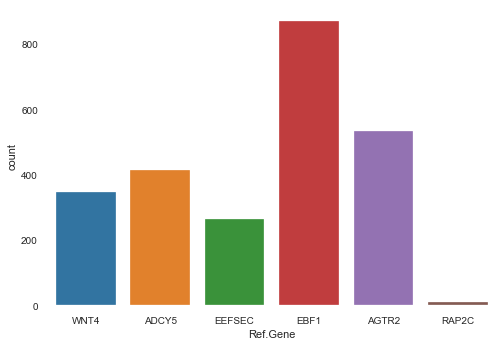

In [19]:
sns.countplot(df[df["Ref.Gene"].isin(genes_gestational)]["Ref.Gene"])

In [20]:
df.columns

Index(['#Chr', 'Start', 'End', 'Ref', 'Alt', 'Ref.Gene', 'Func.refGene',
       'ExonicFunc.refGene', 'Gene.ensGene', 'avsnp147', 'AAChange.ensGene',
       'AAChange.refGene', 'clinvar: Clinvar ',
       ' InterVar: InterVar and Evidence ', 'Freq_gnomAD_genome_ALL',
       'Freq_esp6500siv2_all', 'Freq_1000g2015aug_all', 'CADD_raw',
       'CADD_phred', 'SIFT_score', 'GERP++_RS', 'phyloP46way_placental',
       'dbscSNV_ADA_SCORE', 'dbscSNV_RF_SCORE', 'Interpro_domain',
       'AAChange.knownGene', 'rmsk', 'MetaSVM_score',
       'Freq_gnomAD_genome_POPs', 'OMIM', 'Phenotype_MIM', 'OrphaNumber',
       'Orpha', 'Otherinfo'],
      dtype='object')

In [21]:
#df["clinvar: Clinvar "].unique()
#df['ExonicFunc.refGene'].unique()
#df['Func.refGene'].unique()
#df[' InterVar: InterVar and Evidence '].nunique()
#df['Freq_gnomAD_genome_ALL'].nunique() # More than 13470
#df['Freq_esp6500siv2_all']
#df['CADD_raw'].nunique() # 5805
#df[' InterVar: InterVar and Evidence '].unique()

In [22]:
#df.head().T
#df["clinvar: Clinvar "]

0          clinvar: UNK 
1          clinvar: UNK 
2          clinvar: UNK 
3          clinvar: UNK 
4          clinvar: UNK 
               ...      
6533866    clinvar: UNK 
6533867    clinvar: UNK 
6533868    clinvar: UNK 
6533869    clinvar: UNK 
6533870    clinvar: UNK 
Name: clinvar: Clinvar , Length: 6533871, dtype: object